In [76]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [217]:
# CUR_DATE = "2021-10-01"
cur_date = datetime.strptime("2021-10-01", "%Y-%m-%d")

with open("data/sp500-tickers.txt", 'r') as f:
    tickers = [ t.strip() for t in f.readlines() ]
tickers = tickers[:150]


In [218]:
def getStartDate(date):
    weeks_ago = 8
    startDate = date - timedelta(weeks=weeks_ago)
    dom = startDate.day
    startDate -= timedelta(days=dom-1)
    return startDate

def getEndDate(date):
    return date - timedelta(days=date.day)
    
startDate = getStartDate(cur_date)
endDate = getEndDate(cur_date)
closing_prices = pdr.get_data_yahoo(tickers, startDate, endDate)
# closing_prices = closing_prices.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1)
closing_prices = closing_prices['Adj Close']


/home/ryan/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ALXN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/ryan/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/ryan/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/ryan/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'COG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/ryan/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CTL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/ryan/anaconda3/lib/python

In [220]:
closing_prices.to_csv('data.csv')

<AxesSubplot:xlabel='Date'>

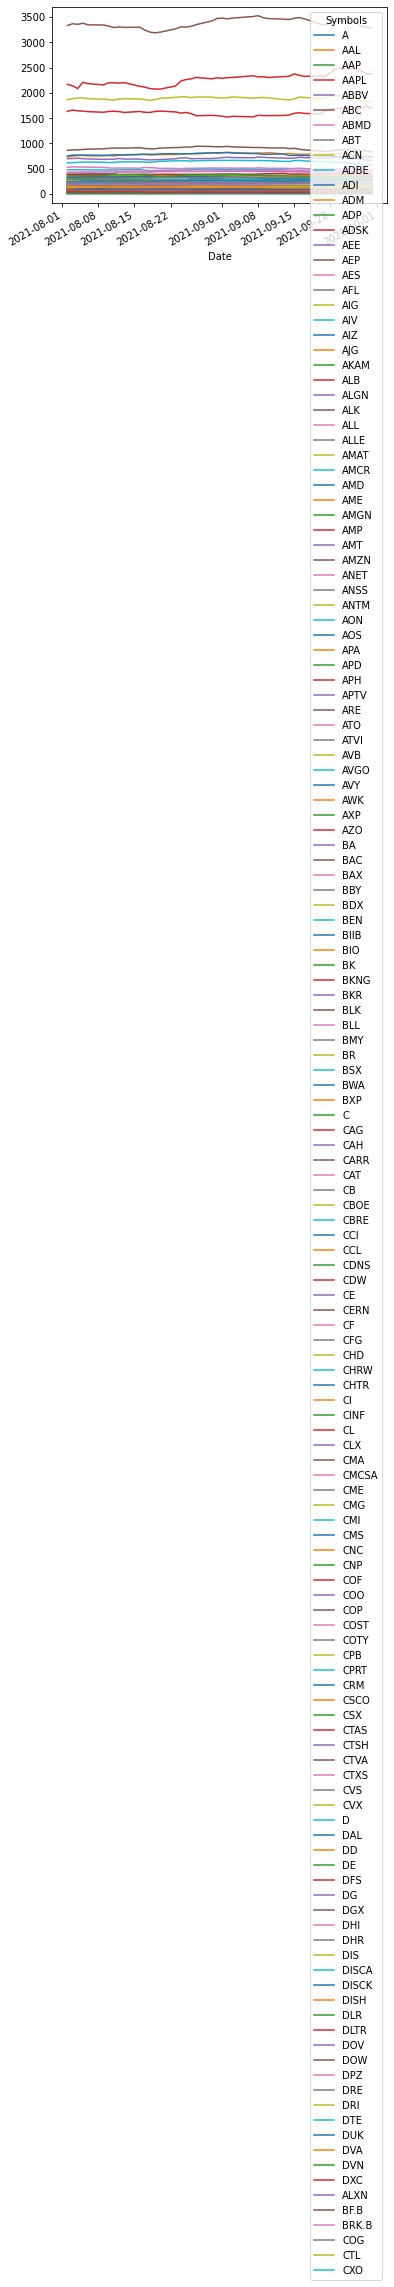

In [219]:
closing_prices.plot()

In [221]:
# col = 'Adj Close'
m = (closing_prices.iloc[-1] - closing_prices.iloc[0]) / closing_prices.shape[0]
b = closing_prices.iloc[0]
xs = np.arange(closing_prices.shape[0])

mom_ar = np.array([ np.arange(closing_prices.shape[0]) for _ in range(len(closing_prices.columns))])
mom_df = pd.DataFrame(mom_ar, index=closing_prices.columns, columns=closing_prices.index).T
mom_df = mom_df*m + b
mom_df.head()

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,DUK,DVA,DVN,DXC,ALXN,BF.B,BRK.B,COG,CTL,CXO
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-02,152.678558,20.059999,210.793320,145.090561,112.895615,121.832626,328.359985,120.031540,314.329437,618.750000,...,104.197304,121.370003,24.582426,42.610001,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-03,152.782014,20.070697,210.728742,145.002264,112.723236,121.767050,328.293939,119.967133,314.418246,617.749302,...,104.021720,121.251166,24.821110,42.400698,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-04,152.885469,20.081395,210.664165,144.913967,112.550857,121.701473,328.227892,119.902726,314.507054,616.748603,...,103.846137,121.132328,25.059793,42.191396,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-05,152.988924,20.092093,210.599588,144.825670,112.378478,121.635897,328.161846,119.838319,314.595862,615.747905,...,103.670553,121.013491,25.298477,41.982094,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-06,153.092380,20.102790,210.535010,144.737373,112.206099,121.570320,328.095800,119.773912,314.684670,614.747207,...,103.494969,120.894654,25.537160,41.772791,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
mse_df = (closing_prices - mom_df)**2

data_df = pd.DataFrame({
    'mse': mse_df.sum(axis=0) / closing_prices.shape[0],
    'm': m
})
analysis_df = (data_df-data_df.min()) / (data_df.max()-data_df.min())
analysis_df = analysis_df.rename(columns={'mse': 'mse_norm', 'm': 'm_norm'})
analysis_df['mse'] = data_df['mse']
analysis_df['m'] = m

analysis_df['close0'] = closing_prices.iloc[0]
analysis_df['close1'] = closing_prices.iloc[-1]
analysis_df['pct_change'] = (analysis_df['close1']-analysis_df['close0']) / analysis_df['close0']
analysis_df['score'] = 1/analysis_df['mse'] * analysis_df['m']
# analysis_df['score'] = analysis_df['m_norm'] - analysis_df['mse_norm']
analysis_df.sort_values(by='score', ascending=False)

,mse_norm,m_norm,mse,m,close0,close1,pct_change,score
Symbols,,,,,,,,
BKR,0.000028,0.220757,0.354064,0.093445,20.534363,24.552511,0.195679,0.263922
CCL,0.000065,0.218923,0.824945,0.082558,21.459999,25.010000,0.165424,0.100077
AJG,0.000340,0.243811,4.287851,0.230306,138.307297,148.210449,0.071603,0.053711
DAL,0.000115,0.217395,1.455272,0.073488,39.450001,42.610001,0.080101,0.050498
DVN,0.000388,0.245223,4.887767,0.238684,24.582426,34.845818,0.417509,0.048833
...,...,...,...,...,...,...,...,...
BF.B,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
BRK.B,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
COG,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [242]:
closing_prices.iloc[-1] - closing_prices.iloc[0]

Symbols
A        4.448578
AAL      0.460001
AAP     -2.776825
AAPL    -3.796768
ABBV    -7.412292
           ...   
BF.B          NaN
BRK.B         NaN
COG           NaN
CTL           NaN
CXO           NaN
Length: 150, dtype: float64

In [232]:
analysis_df.sort_values(by='m', ascending=False)

,mse_norm,m_norm,mse,m,pct_change,score
Symbols,,,,,,
BKNG,0.346821,1.000000,4372.925042,4.719306,0.093476,0.001079
AZO,0.441912,0.455659,5571.889340,1.487907,0.039155,0.000267
CRM,0.004092,0.323952,51.594470,0.706047,0.126048,0.013685
AON,0.010561,0.306045,133.156900,0.599744,0.099369,0.004504
COST,0.018239,0.284921,229.972135,0.474349,0.047631,0.002063
...,...,...,...,...,...,...
BF.B,0.000000,NaN,0.000000,NaN,NaN,NaN
BRK.B,0.000000,NaN,0.000000,NaN,NaN,NaN
COG,0.000000,NaN,0.000000,NaN,NaN,NaN


In [233]:
analysis_df.sort_values(by='pct_change', ascending=False)

,mse_norm,m_norm,mse,m,pct_change,score
Symbols,,,,,,
DVN,0.000388,0.245223,4.887767,0.238684,0.417509,0.048833
COP,0.001738,0.253130,21.909732,0.285626,0.223727,0.013036
CF,0.001318,0.244557,16.612846,0.234733,0.222011,0.014130
CMA,0.000689,0.257308,8.692607,0.310429,0.200778,0.035712
BKR,0.000028,0.220757,0.354064,0.093445,0.195679,0.263922
...,...,...,...,...,...,...
BF.B,0.000000,NaN,0.000000,NaN,NaN,NaN
BRK.B,0.000000,NaN,0.000000,NaN,NaN,NaN
COG,0.000000,NaN,0.000000,NaN,NaN,NaN


In [246]:
closing_prices
closing_prices[['BKR', 'CCL', 'BKNG', 'DVN']]

Symbols,BKR,CCL,BKNG,DVN
Date,,,,
2021-08-02,20.534363,21.459999,2170.939941,24.582426
2021-08-03,20.977337,21.430000,2139.290039,25.276791
2021-08-04,20.307953,21.040001,2085.639893,24.389547
2021-08-05,20.534363,22.549999,2207.709961,25.681835
2021-08-06,20.859211,23.080000,2182.979980,26.048306
2021-08-09,20.938637,22.709999,2157.780029,25.691481
2021-08-10,21.206699,23.650000,2200.469971,26.665518
2021-08-11,21.355621,23.990000,2200.219971,27.003057
2021-08-12,21.196770,23.360001,2193.169922,27.456322


<AxesSubplot:xlabel='Date'>

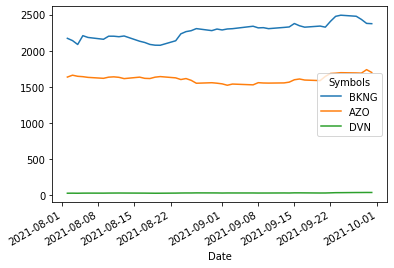

In [235]:
closing_prices[['BKNG', 'AZO', 'DVN']].plot()

<AxesSubplot:xlabel='Date'>

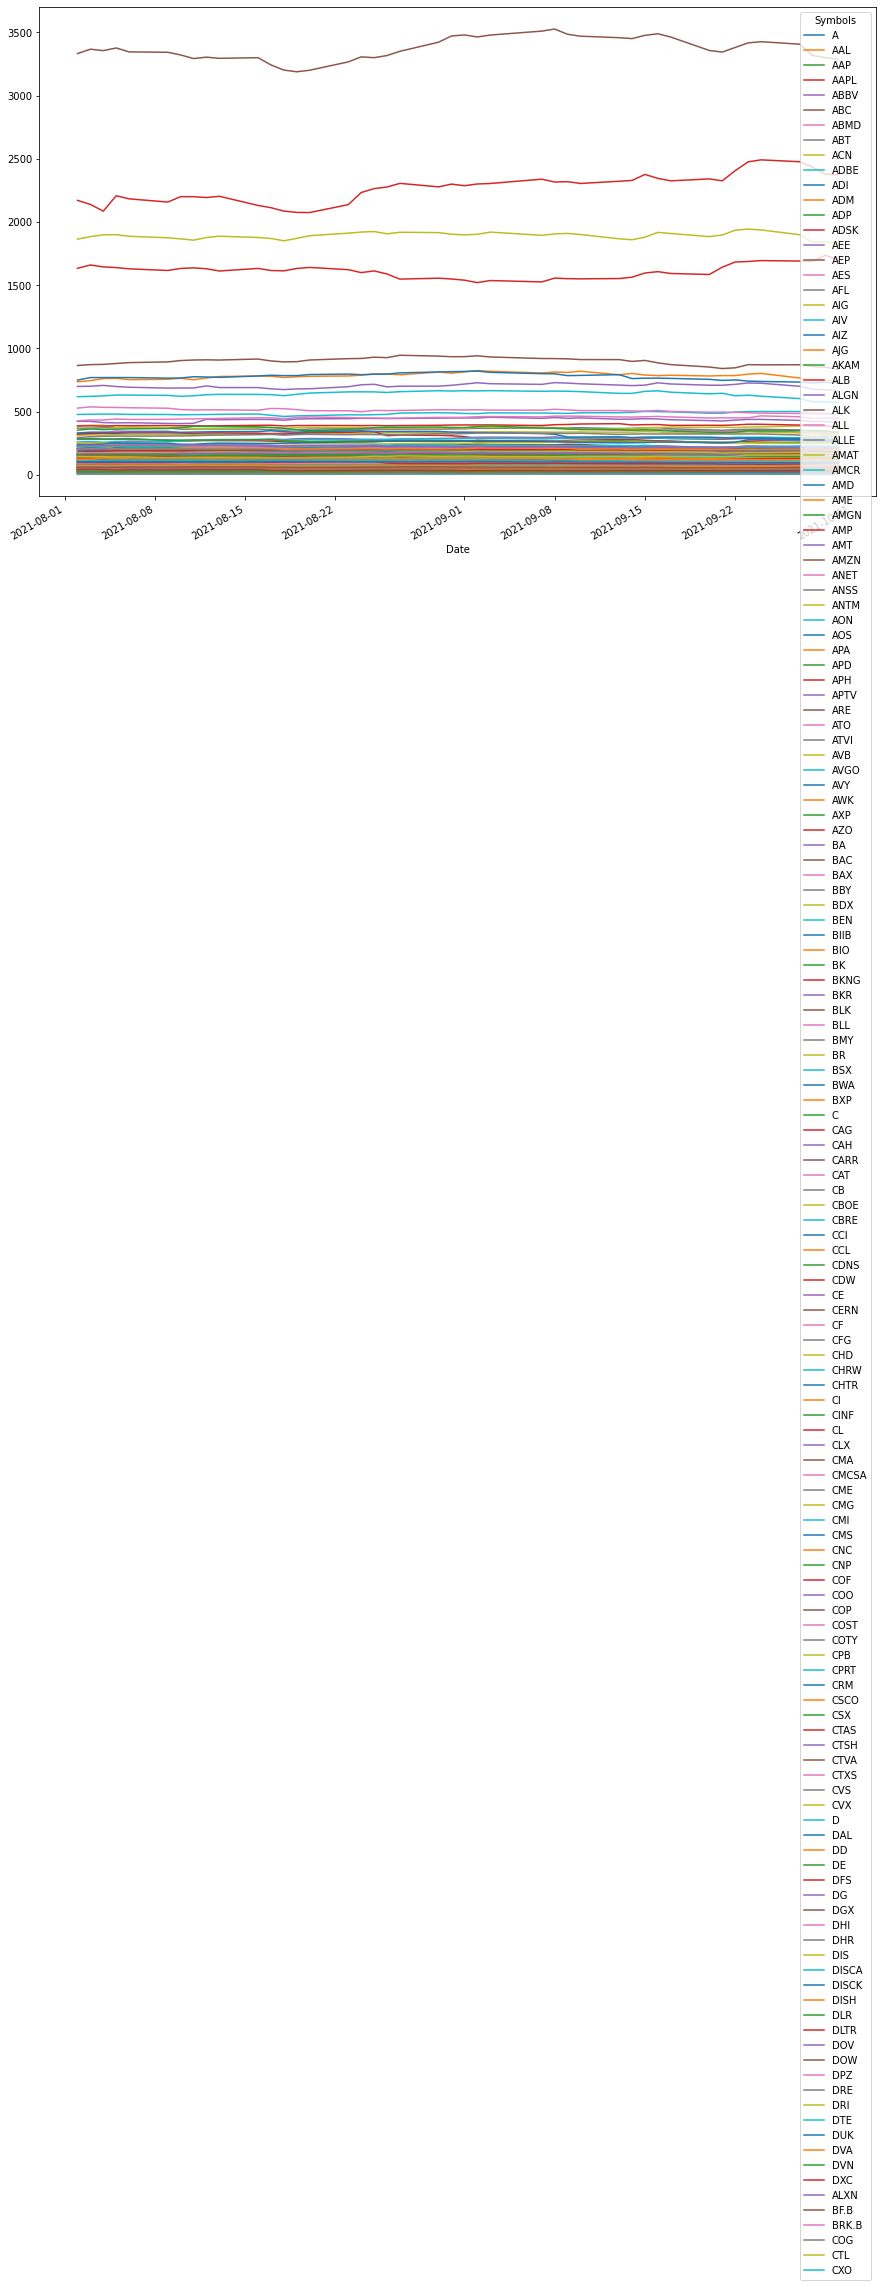

In [223]:
closing_prices.plot(figsize=(15,10))

In [180]:
m

Symbols
AMCR    0.004080
AMD    -0.133256
AME    -0.325303
dtype: float64

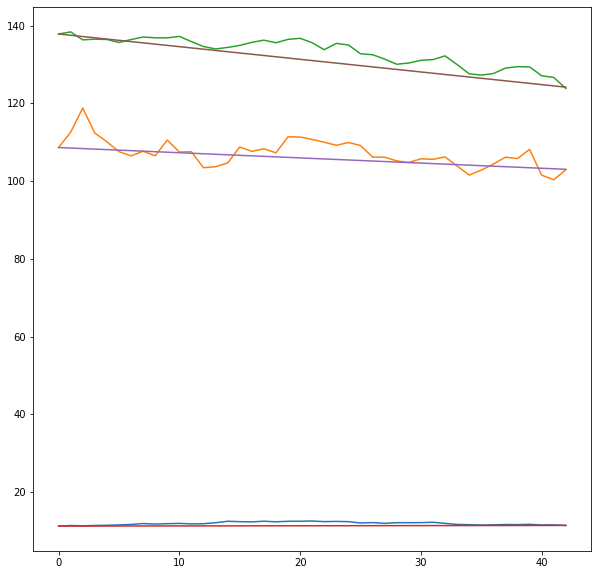

In [182]:
xs = range(closing_prices.shape[0])
plt.figure(figsize=(10,10))
plt.plot(xs, closing_prices)
plt.plot(xs, mom_df)
plt.show()

In [ ]:
analysis['mse']